In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import random


In [4]:
with open('embedding_data/Metapath2vec_8212.pickle', 'rb') as f:
    Metapath2vec_8212 = pickle.load(f)

In [5]:
with open('embedding_data/Metapath2vec+NPMI+M2V.pickle', 'rb') as f:
    Metapath2vec_NPMI_M2V = pickle.load(f)

Index(['Bakery/Dessert/Snack', 'Beverage Alcoholic', 'Cereal/Crop/Bean',
       'Dairy', 'Fruit', 'Meat/Animal Product', 'Plant/Vegetable', 'Seafood'],
      dtype='object')

In [8]:
X = [random.choices([0,1])[0] for i in range(10)]

In [16]:
X = []
for j in range(100):
    X.append([random.choices([0,1])[0] for i in range(881)])

In [2]:
def node_name2vec(name,file):
    """
    This is function for convert nodeName to vector.
    
    Input argument type is string and output data is float vector list.
    
    1:node name. 2:file name.
    """
    with open(file, "rb") as pickle_file:
        vectors = pickle.load(pickle_file)
    node_data = pd.read_csv("../input/nodes_8212.csv")
    node_name_ls = list(node_data["name"].values)
    name = name.replace(' ',"_")
    if name in node_name_ls:
        id = str(node_data[node_data["name"] == name]["node_id"].values[0])
        vec = vectors[id]
    else:
        vec = None
    return vec

ModuleNotFoundError: No module named 'bhtsne'

In [75]:
!pip install bhtsne

  Using cached bhtsne-0.1.9.tar.gz (86 kB)
    ERROR: Command errored out with exit status 1:
     command: /Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/m7/9820n9s97wz7kypnq0s_0f980000gn/T/pip-install-kb8kyf09/bhtsne_50cd2baa24c64533a494dc9aa0f11f0a/setup.py'"'"'; __file__='"'"'/private/var/folders/m7/9820n9s97wz7kypnq0s_0f980000gn/T/pip-install-kb8kyf09/bhtsne_50cd2baa24c64533a494dc9aa0f11f0a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/m7/9820n9s97wz7kypnq0s_0f980000gn/T/pip-pip-egg-info-bql0ax0t
         cwd: /private/var/folders/m7/9820n9s97wz7kypnq0s_0f980000gn/T/pip-install-kb8kyf09/bhtsne_50cd2baa24c64533a49

In [37]:
colors =  ["r", "g", "c", "m", "y", "k", "orange","pink"]
def plot_tSNE(file,perplexity):
    cd = pd.read_csv("../classification_data/node_classification_hub.csv")
    classification_data = pd.read_csv("../classification_data/node_classification_160.csv")
    categories = cd.columns
    trg_df = pd.DataFrame()
    for category in categories:
        add_df = classification_data[classification_data["category"] == category]
        trg_df = pd.concat([trg_df,add_df])
    tsne = TSNE(n_components=2, init='random', random_state=40, perplexity=perplexity)
    vec_ls = [node_name2vec(name,file) for name in trg_df["ingredient"]]
    embed_vec = tsne.fit_transform(vec_ls)
    trg_df["embed_1"] = embed_vec.T[0]
    trg_df["embed_2"] = embed_vec.T[1]
    # print("plot data length:",len(trg_df))
    plt.figure(figsize=(8,6))
    colors =  ["r", "g", "c", "m", "y", "k", "orange","pink"]
    for i , cat in enumerate(categories):
        tmp_df = trg_df[trg_df["category"] == cat]
        plt.scatter(tmp_df["embed_1"], tmp_df["embed_2"],label = cat,color = colors[i])
    plt.legend(fontsize = 8)
    
    # 
    # for col in classification_data.columns:
    #     X = [node_name2vec(name,file) for name in trg_data[col]]
    #     X_embedded = tsne.fit_transform(X)
        
    

In [68]:
from sklearn.decomposition import PCA



def plot_PCA(file):
    cd = pd.read_csv("../classification_data/node_classification_hub.csv")
    classification_data = pd.read_csv("../classification_data/node_classification_160.csv")
    categories = cd.columns
    trg_df = pd.DataFrame()
    for category in categories:
        add_df = classification_data[classification_data["category"] == category]
        trg_df = pd.concat([trg_df,add_df])
    pca = PCA(n_components=4)  # PCA を行ったり PCA の結果を格納したりするための変数を、pca として宣言
     
    vec_ls = [node_name2vec(name,file) for name in trg_df["ingredient"]]
    df_pca = pd.DataFrame(pca.fit_transform(vec_ls))
    print(df_pca)
    trg_df["embed_1"] = df_pca[0]
    trg_df["embed_2"] = df_pca[1]
    # print("plot data length:",len(trg_df))
    plt.figure(figsize=(8,6))
    colors =  ["r", "g", "c", "m", "y", "k", "orange","pink"]
    for i , cat in enumerate(categories):
        tmp_df = trg_df[trg_df["category"] == cat]
        plt.scatter(tmp_df["embed_1"], tmp_df["embed_2"],label = cat,color = colors[i])
    plt.legend(fontsize = 8)

            0         1         2         3
0    1.089950 -0.254316  0.062626 -0.224985
1    0.853824  0.077932 -0.269354  0.073360
2    1.021930  0.208842  0.457789 -0.302804
3    0.280123  0.741573 -0.090341 -0.260021
4    1.256055 -0.274418 -0.227046 -0.141668
..        ...       ...       ...       ...
155  1.033558  0.103452 -0.192951  0.038344
156 -0.077235  0.769488 -0.001154  0.263667
157  1.048017  0.085333  0.003029  0.342750
158  0.033993 -0.435431  0.850518  0.999756
159 -0.063313  0.966502 -0.159149  0.240927

[160 rows x 4 columns]
            0         1         2         3
0    1.177238  0.202536  0.105431  0.250989
1    1.097143 -0.091201 -0.208744 -0.021701
2    1.016154 -0.509560  0.463970  0.217850
3    0.196406 -0.643065 -0.096238  0.348644
4    1.208398  0.209378 -0.480724  0.240664
..        ...       ...       ...       ...
155  1.099392 -0.129974 -0.108312 -0.118142
156 -0.211541 -0.686454 -0.141550 -0.289298
157  1.133606  0.012027  0.061991 -0.514689
158  0.1

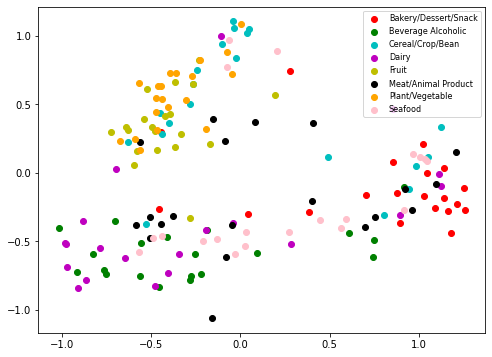

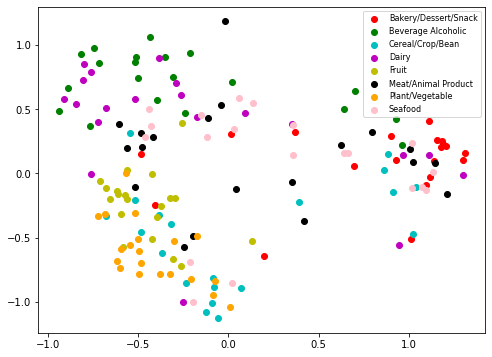

In [69]:
plot_PCA('../embedding_data/Metapath2vec+CSP.pickle')
plot_PCA('../embedding_data/Metapath2vec+NPMI+M2V_chembl_300_w10.pickle')

/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


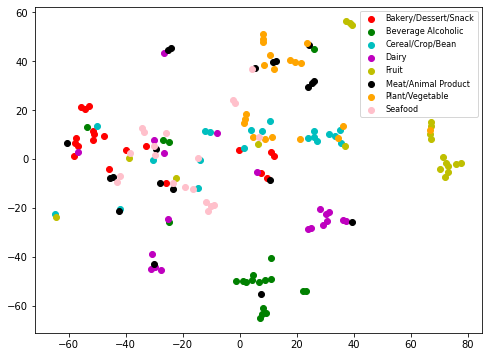

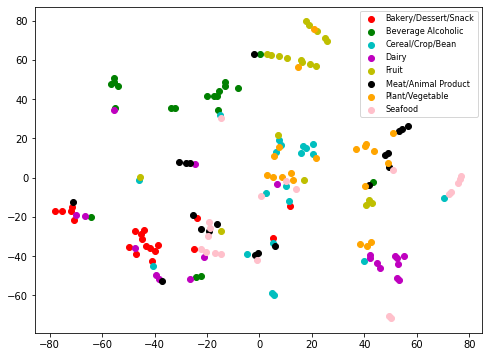

In [61]:
p = 2.15
plot_tSNE('../embedding_data/Metapath2vec+CSP.pickle',p)
plot_tSNE('../embedding_data/Metapath2vec+NPMI+M2V_chembl_300_w10.pickle',p)

10


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


20


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


30


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


40


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


50


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


60


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


70


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


80


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


90


/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/naokiyoshimaru/opt/anaconda3/envs/FlavorGraph_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


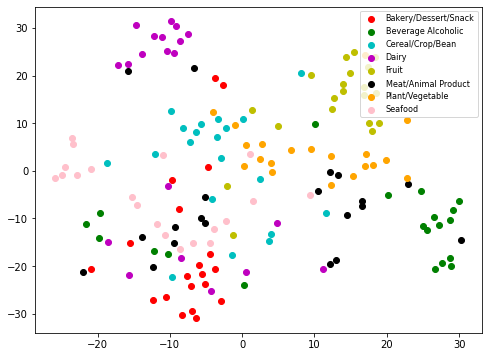

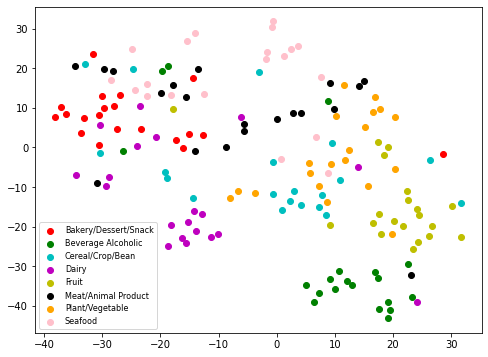

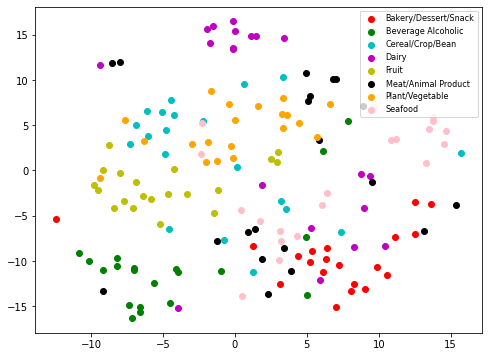

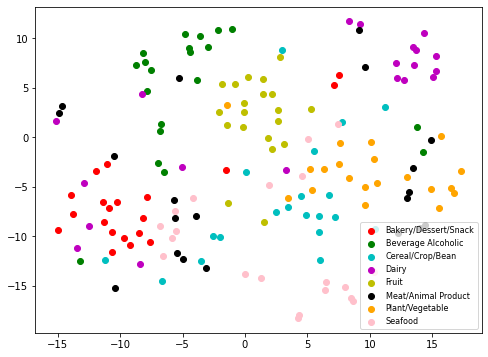

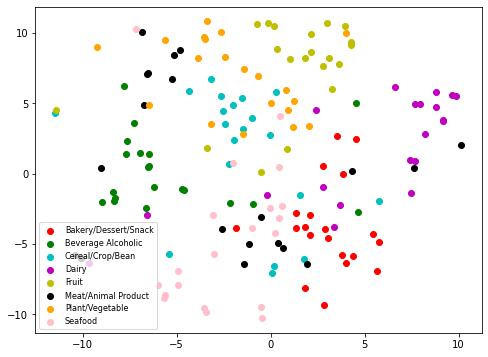

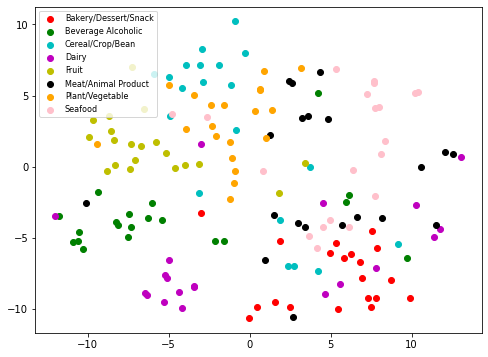

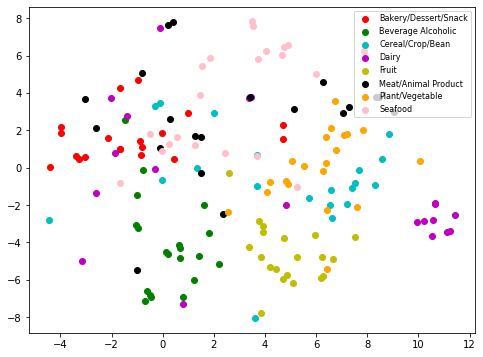

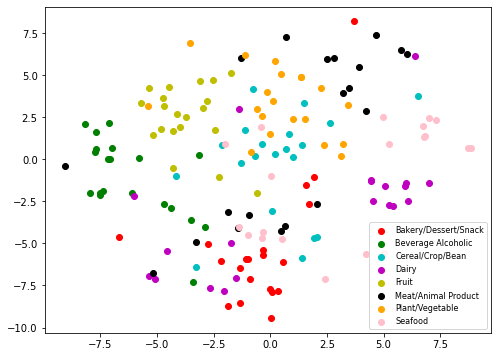

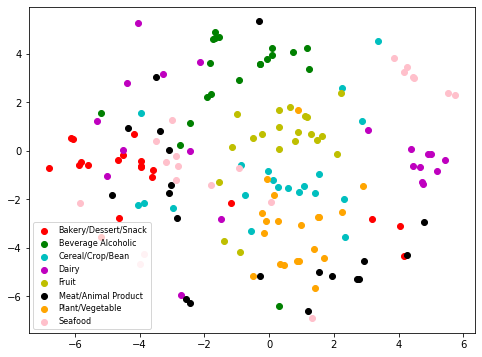

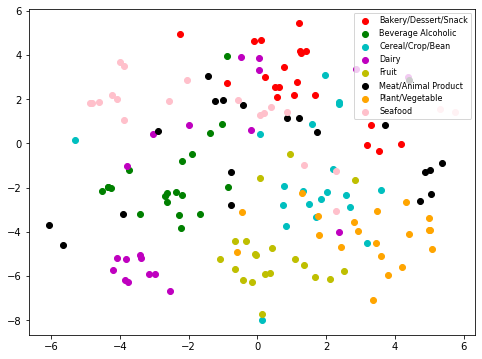

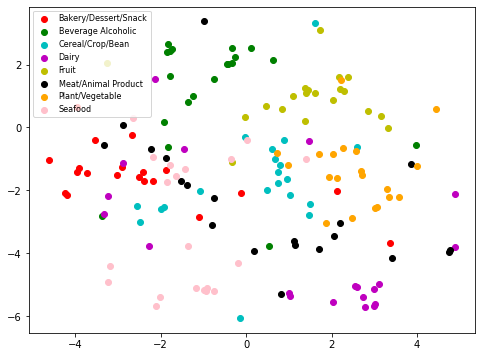

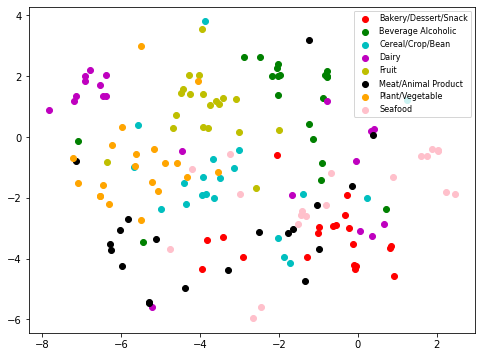

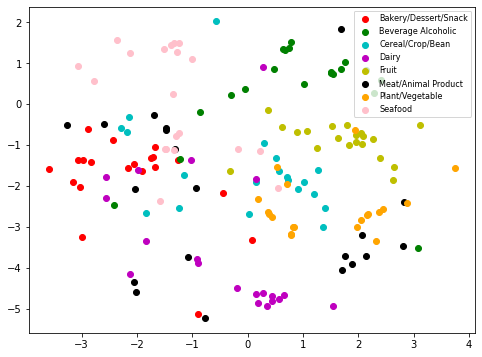

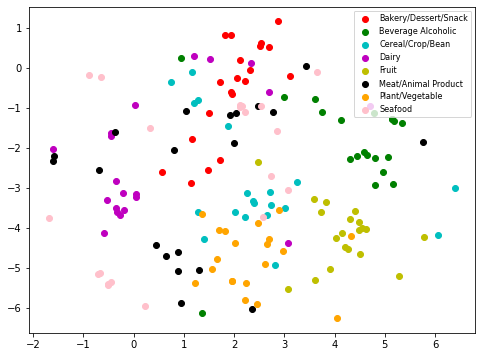

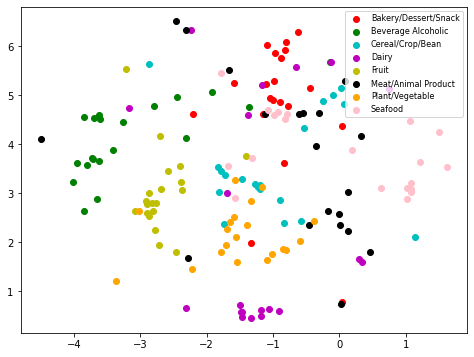

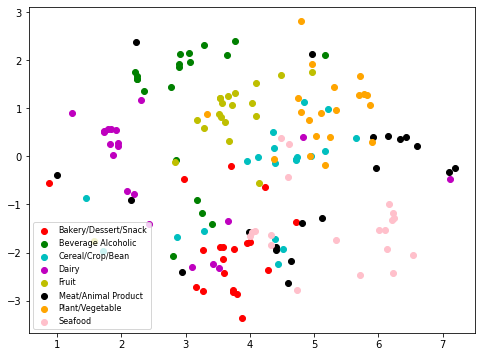

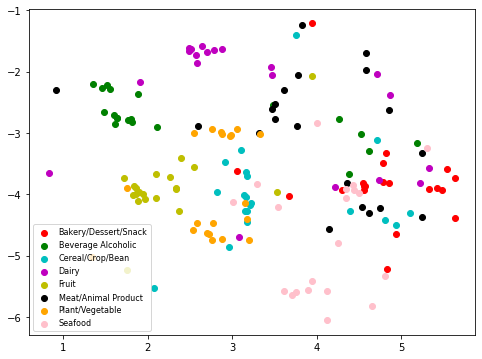

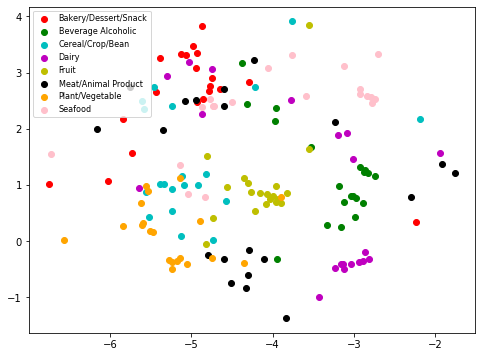

In [40]:

for p in range(10,100,10):
    print(p)
    plot_tSNE('../embedding_data/Metapath2vec+CSP.pickle',p)
    plot_tSNE('../embedding_data/Metapath2vec+NPMI+M2V_chembl_300_w10.pickle',p)